## Combine all $(r, M_1, M_2)$ bins:

After talking to Julian, I am convinced the ordering of the output doesn't matter. So I will ignore this section for now.


Text(0, 0.5, 'distance')

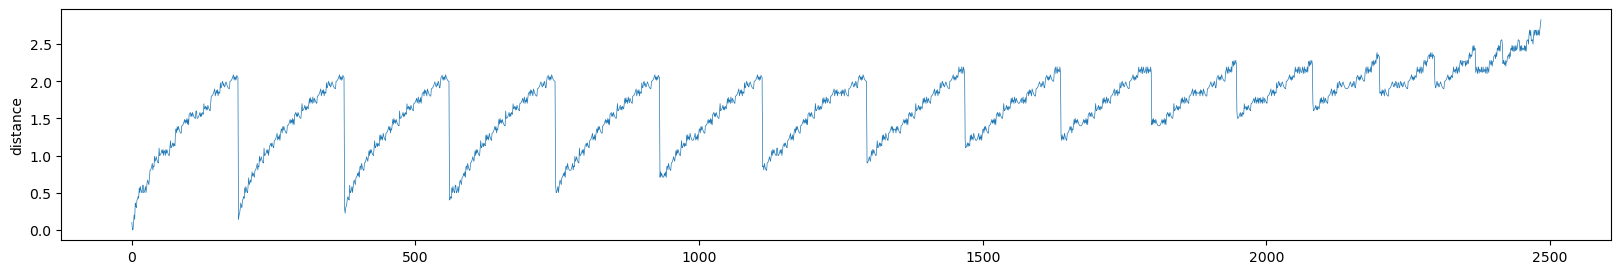

In [11]:
# How to concatenate the xi(r, M1, M2) into one array
import numpy as np
import importlib
from matplotlib import pyplot as plt
from gal_goku import summary_stats

## Load the data
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid, narrow = 'L2', 'wide'
xi = summary_stats.Xi(data_dir, fid, narrow=narrow, logging_level='ERROR')
rcut=(0.2, 61)

dist_pairs = np.sqrt((xi.mass_pairs[:,0] - xi.mass_pairs[0,0])**2 + (xi.mass_pairs[:,1] - xi.mass_pairs[0,1])**2)
dist_bins = np.arange(0, 2*np.sqrt(2), 0.1)
ind_dist = np.digitize(dist_pairs, dist_bins)

sorted_dist = np.array([])
for c, i in enumerate(ind_dist):
    this_dist = dist_pairs[ind_dist == i]
    this_masses = xi.mass_pairs[ind_dist == i]
    ind_this_massess_sort = np.argsort(this_masses[:,1])
    if c%2 == 0:
        this_dsit_sorted = this_dist[ind_this_massess_sort]
    else:
        this_dsit_sorted = this_dist[ind_this_massess_sort[::-1]]
    sorted_dist = np.append(sorted_dist, this_dsit_sorted)

fig, ax = plt.subplots(1, 1, figsize=(20, 3))
ax.plot(sorted_dist, lw=0.5)
ax.set_ylabel(f'distance')

2025-04-11 16:17:33.891470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 16:17:33.894706: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 16:17:33.904824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744406253.922181  363469 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744406253.927193  363469 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 16:17:33.945229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

total (r, M1, M2) bin counts = 6006
total (r, M1, M2) bin counts = 6006


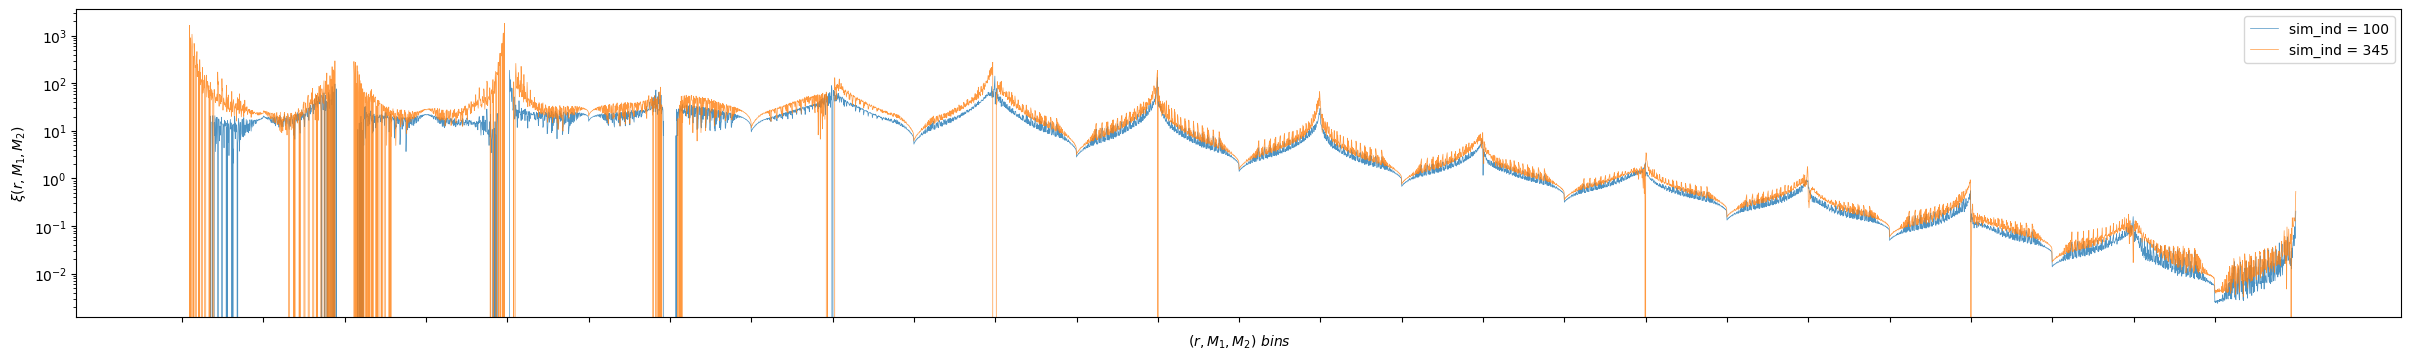

In [1]:
# How to concatenate the xi(r, M1, M2) into one array
import numpy as np
import importlib
from matplotlib import pyplot as plt
from gal_goku import summary_stats

## Load the data
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid, narrow = 'L2', 'wide'
xi = summary_stats.Xi(data_dir, fid, narrow=narrow, logging_level='ERROR')
rcut=(0.2, 61)

dist_pairs = np.sqrt((xi.mass_pairs[:,0] - xi.mass_pairs[0,0])**2 + (xi.mass_pairs[:,1] - xi.mass_pairs[0,1])**2)
ind_dist = np.digitize(dist_pairs, np.arange(0, 2*np.sqrt(2), 0.1))
ind_sort = np.argsort(dist_pairs)
ind_r = np.where((xi.rbins > rcut[0]) & (xi.rbins < rcut[1]))[0]


fig, ax = plt.subplots(1, 1, figsize=(30,4))
for sim_ind in [100, 345]:
        all_xis = []
        for c, i in enumerate(ind_r):
                if c%2 == 0:
                        ind = ind_sort
                else:
                        ind = ind_sort[::-1]
                all_xis.append(xi.xi[sim_ind, ind, i])
        all_xis = np.array(all_xis).flatten()
        print(f'total (r, M1, M2) bin counts = {len(all_xis)}')


        ax.plot(all_xis, lw=0.5, alpha=0.8, label=f'sim_ind = {sim_ind}')
        ax.set_yscale('log')
        ax.set_ylabel(r'$\xi(r, M_1, M_2)$')
        ax.set_xlabel(r'$(r, M_1, M_2) \ bins$')

        # Set x-axis ticks at intervals of 50
        x_ticks = np.arange(0, len(all_xis), 231)
        ax.set_xticks(x_ticks)
        # Remove tick labels by setting them to empty strings
        empty_labels = ['' for _ in x_ticks]
        ax.set_xticklabels(empty_labels)
        ax.grid()
ax.legend()

In [8]:
print(f'missing bins fraction = {(np.where(all_xis==-1)[0].size/all_xis.size):.2f}')

missing bins fraction = 0.05


total (r, M1, M2) bin counts = 11550


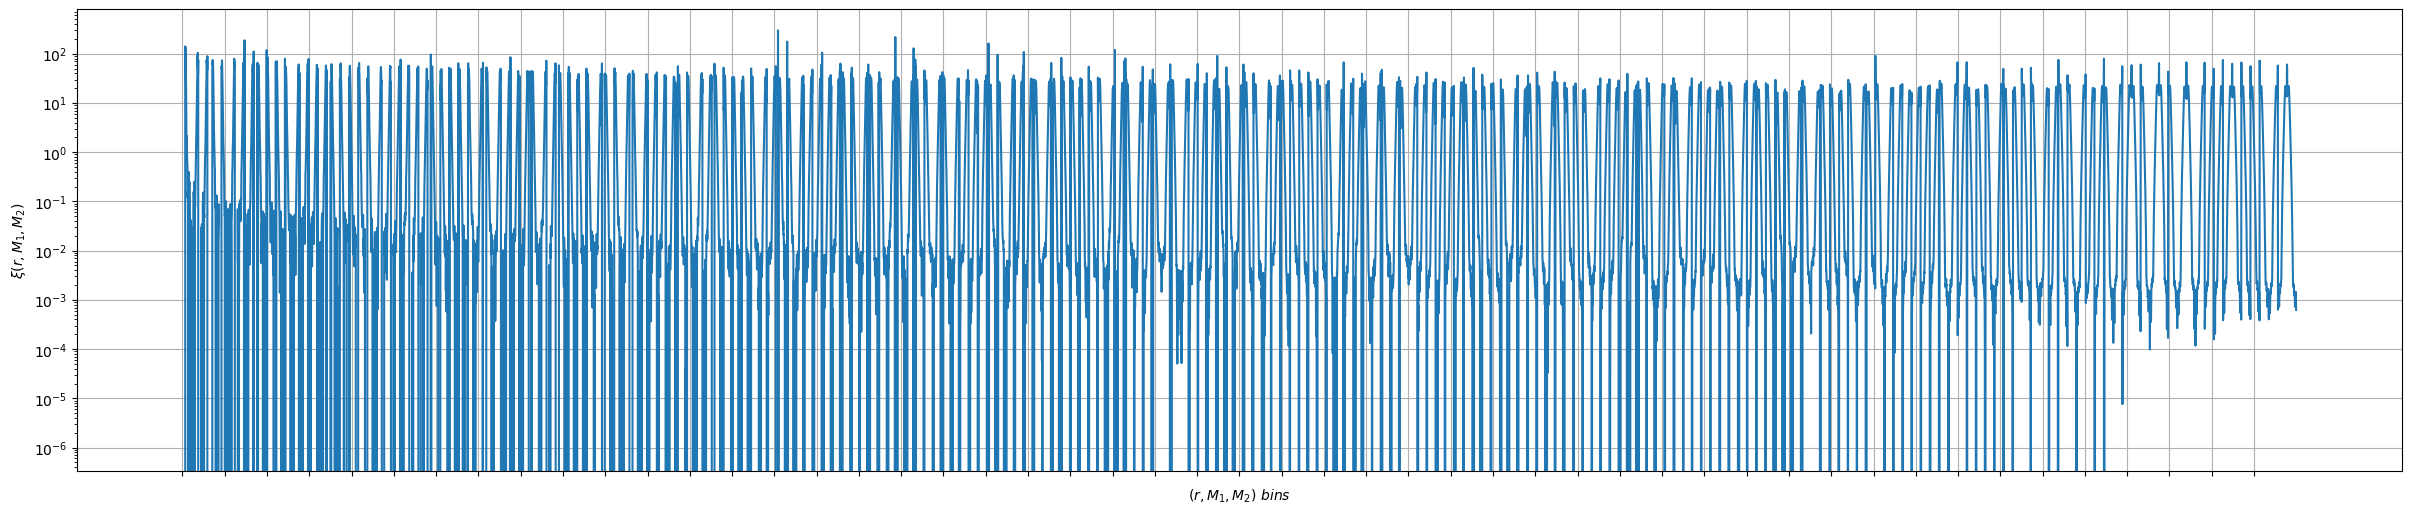

In [56]:
# How to concatenate the xi(r, M1, M2) into one array
import numpy as np
import importlib
from matplotlib import pyplot as plt
from gal_goku import summary_stats

## Load the data
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid, narrow = 'L2', 'wide'
xi = summary_stats.Xi(data_dir, fid, narrow=narrow, logging_level='ERROR')

dist_pairs = np.sqrt((xi.mass_pairs[:,0] - xi.mass_pairs[0,0])**2 + (xi.mass_pairs[:,1] - xi.mass_pairs[0,1])**2)
ind_sort = np.argsort(dist_pairs)


all_xis = []
sim_ind = 100
for i in ind_sort:
        if i%2 == 0:
                ind = np.arange(xi.xi.shape[-1])
        else:
               ind = np.arange(xi.xi.shape[-1])[::-1]
        all_xis.append(xi.xi[sim_ind,i, ind])
all_xis = np.array(all_xis).flatten()
print(f'total (r, M1, M2) bin counts = {len(all_xis)}')

fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.plot(all_xis)
ax.set_yscale('log')
ax.set_ylabel(r'$\xi(r, M_1, M_2)$')
ax.set_xlabel(r'$(r, M_1, M_2) \ bins$')

# Set x-axis ticks at intervals of 50
x_ticks = np.arange(0, len(all_xis), 231)
ax.set_xticks(x_ticks)
# Remove tick labels by setting them to empty strings
empty_labels = ['' for _ in x_ticks]
ax.set_xticklabels(empty_labels)
ax.grid()

## build the MF GP:

The emu run for `num_latents=10` and `num_inducing=100`, `replace=-1`, `err=1e2`:

In [1]:
import numpy as np
import importlib
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_hetero'
model_file=f'xi_emu_combined_inducing_300_latents_100.pkl'
emu = emus_multifid.XiNativeBinsFullDimReduc(data_dir=data_dir, logging_level='INFO')
emu.train(train_subdir=train_subdir, 
          opt_params={'max_iters':100, 'initial_lr':5e-3},
          num_inducing=100, num_latents=10, 
          model_file=model_file)


2025-04-15 16:42:09.167079: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 16:42:09.170311: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 16:42:09.180219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744753329.196722  627507 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744753329.201530  627507 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 16:42:09.219352: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

summary_stats | 04/15/2025 04:42:11 PM | Rank 0 | INFO  |  Found 15.3 % of xi(r,n1,n2) is nan


/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:650: RuntimeWarning: invalid value encountered in log10
  log_corr = np.log10(self.xi[:,:,ind_r]).squeeze()


summary_stats | 04/15/2025 04:42:12 PM | Rank 0 | INFO  |  Found 3.6 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:12 PM | Rank 0 | INFO  |  Found 3.6 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 2.7 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 2.7 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 2.7 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 0.3 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 0.3 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 0.3 % of xi(r,n1,n2) is nan
summary_stats | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Found 0.3 % of xi(r,n1,n2) is nan


2025-04-15 16:42:13.226944: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Built the model with
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  #num_latents 10
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  output_dim 6006
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  num_inducing 100
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  varaince dim (1,)
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  Loading model from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_hetero/xi_emu_combined_inducing_300_latents_100.pkl
XiNativeBinsFullDimReduc | 04/15/2025 04:42:13 PM | Rank 0 | INFO  |  /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_hetero/xi_emu_combined_inducing_300_latents_100.pkl already trained for 100 iterations


XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  Built the model with
XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  #num_latents 10
XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  output_dim 6006
XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  num_inducing 100
XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  varaince dim (1,)
XiNativeBinsFullDimReduc | 04/15/2025 04:55:05 PM | Rank 0 | INFO  |  Loading model from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_hetero/xi_emu_combined_inducing_300_latents_100.pkl


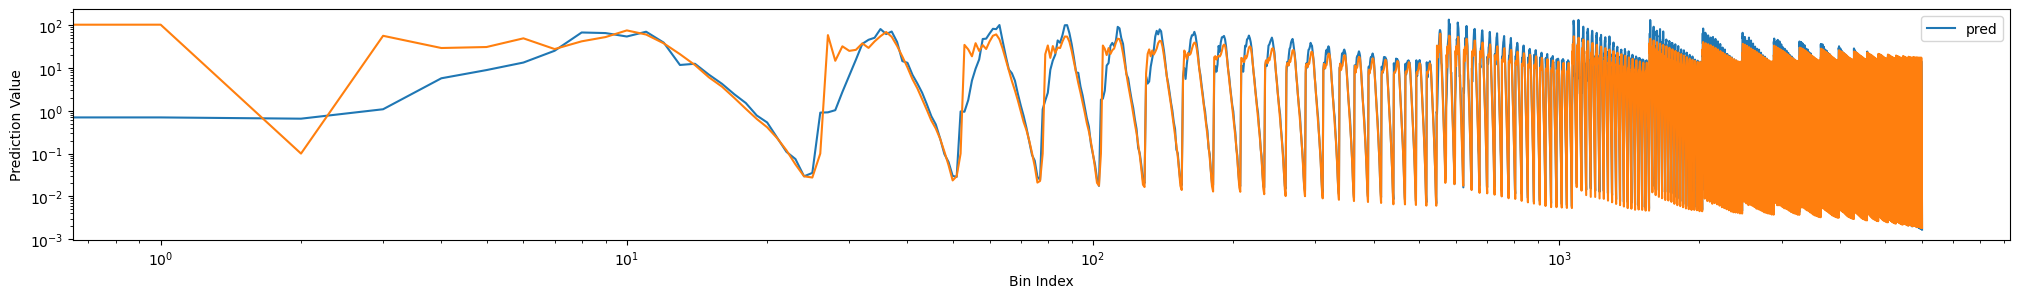

In [16]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(25, 3))
mean_pred, var_pred = emu.predict(ind_test=np.array([11]), model_file=model_file, train_subdir=train_subdir)

ax.plot(np.arange(mean_pred.shape[1]), 10**mean_pred[0], label='pred')
#ax.fill_between(np.arange(mean_pred.shape[1]), 
#                10**mean_pred[0] - 10**np.sqrt(var_pred[0]), 
#                10**mean_pred[0] + 10**np.sqrt(var_pred[0]), 
#                alpha=0.3)
ax.plot(np.arange(mean_pred.shape[1]), 10**emu.Y[1][11])
ax.set_xlabel('Bin Index')
ax.set_ylabel('Prediction Value')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

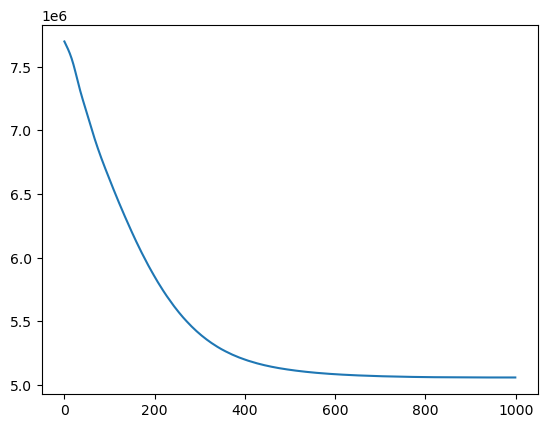

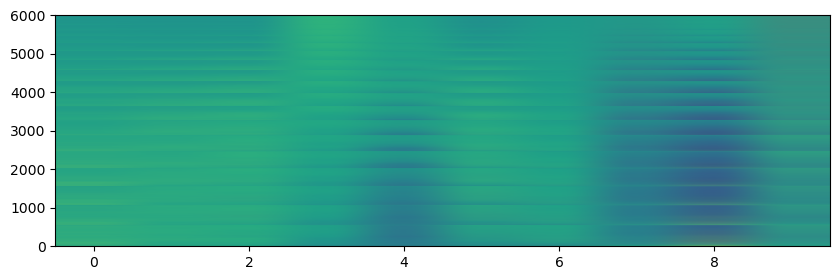

In [17]:
from matplotlib import pyplot as plt
plt.plot(emu.emu.loss_history)
fig, ax= plt.subplots(1, 1, figsize=(10, 3))
ax.imshow(emu.emu.kernel.W, aspect='auto', cmap='viridis', origin='lower')